# Analysis of Airline Passenger Satisfaction 
---
### Basic Statistics And General Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
import numpy as np


#Importing csv file to be analyzed 
airline_pass_data = Path("Resources/airline_passenger_satisfaction.csv")
# Reading the airline data and survey results
airline_data = pd.read_csv(airline_pass_data)

# Displaying the data table for preview
airline_data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [3]:
#checking our data 
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
#for comfortable calculations let's replace all "0" in DF with NaN, so it would be ignored in calculations 
survey_columns = [
    "Departure and Arrival Time Convenience", "Ease of Online Booking", "Check-in Service", 
    "Online Boarding", "Gate Location", "On-board Service", "Seat Comfort", "Leg Room Service",
    "Cleanliness", "Food and Drink", "In-flight Service", "In-flight Wifi Service", 
    "In-flight Entertainment", "Baggage Handling"
]

# Creating a copy of the original DataFrame
airline_data_cleaned = airline_data.copy()

# Replacing "0" with NaN in the survey columns
airline_data_cleaned[survey_columns] = airline_data_cleaned[survey_columns].replace(0, np.nan)

# Display the cleaned DataFrame
airline_data_cleaned


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4.0,...,5.0,1.0,4.0,4.0,4.0,5.0,4.0,4.0,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5.0,...,5.0,2.0,5.0,2.0,2.0,4.0,3.0,2.0,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5.0,...,3.0,3.0,4.0,3.0,3.0,4.0,2.0,3.0,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4.0,...,4.0,4.0,5.0,3.0,3.0,4.0,5.0,3.0,5,Satisfied


In [5]:
#Total number of passengers in survey
total_passengers = airline_data_cleaned["ID"].nunique()
#another way to calculate data
# total_passengers = airline_data['ID'].count()
print (f"Total number of passengers in survey: {total_passengers}")

Total number of passengers in survey: 129880


**Basic Statistics for Age, Flight Distance, Departure Delay, and Arrival Delay**

In [6]:
#Basic Statistics for Age, Flight Distance, Departure Delay, and Arrival Delay
columns = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

# Create a DataFrame to store the statistics
statistics_df = pd.DataFrame(columns=['Mean', 'Median', 'Mode'], index=columns)

# Calculate and populate the statistics for each column
for col in columns:
    mean = airline_data[col].mean()
    median = airline_data[col].median()
    mode = airline_data[col].mode().iloc[0] if not airline_data[col].mode().empty else None
    
    statistics_df.loc[col] = [mean, median, mode]

# Display the statistics DataFrame
statistics_df

,Mean,Median,Mode
Age,39.427957,40.0,39
Flight Distance,1190.316392,844.0,337
Departure Delay,14.713713,0.0,0
Arrival Delay,15.091129,0.0,0.0


**Overall Satisfied and Neutral or Dissatisfied passengers**

In [7]:

# total number of passengers with satisfied reviews
satisfied_pass = airline_data[(airline_data['Satisfaction'] == 'Satisfied') & (airline_data['Satisfaction'] != 0)]
total_passengers = len(airline_data)
satisfied_count = len(satisfied_pass)
satisfied_percentage = (satisfied_count / total_passengers) * 100

satisfied_percentage


43.44625808438558

In [8]:
### get the number of 'Neutral or Dissatisfied' reviews
disatisfied_pass = airline_data[airline_data['Satisfaction'] == 'Neutral or Dissatisfied']
disatisfied_count = len(disatisfied_pass)
disatisfied_percentage = (disatisfied_count / total_passengers) * 100

disatisfied_percentage

56.55374191561441

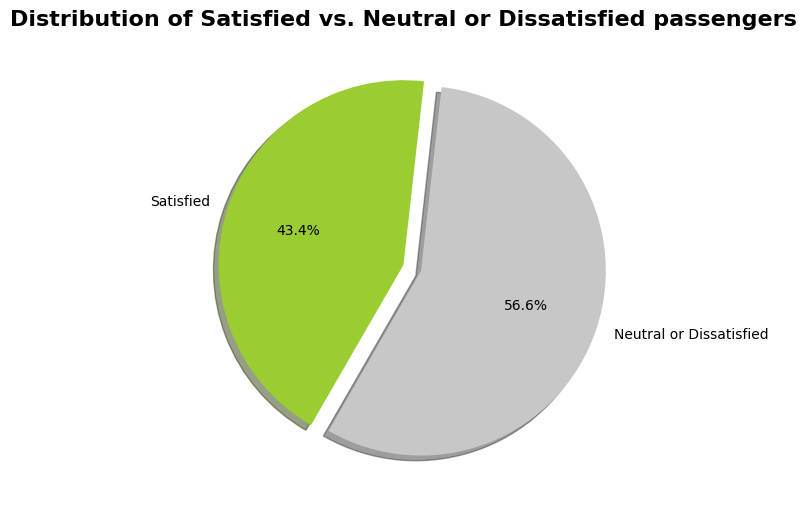

In [9]:
# generating pie plot showing the distribution of Satisfied and Neutral or Dessatisfied passengers
happiness_data = airline_data_cleaned["Satisfaction"].value_counts()
colors = ['#C7C7C7','yellowgreen'] 
plt.figure(figsize=(8,6))
happiness_data.plot.pie(autopct= "%1.1f%%", startangle= -120, explode=(0.1,0), shadow = True, colors=colors)
plt.title("Distribution of Satisfied vs. Neutral or Dissatisfied passengers",fontsize=16, fontweight='bold')

plt.ylabel('')  # Remove the y-axis label for a cleaner look
plt.show()

Top and Bottom 5 of Airline Services According to Survey

Top 5 Services by Satisfaction:
In-flight Service    3.642333
Baggage Handling     3.632114
Seat Comfort         3.441388
On-board Service     3.383153
Leg Room Service     3.366377
dtype: float64

Bottom 5 Services by Satisfaction:
Departure and Arrival Time Convenience    3.223411
Food and Drink                            3.208034
Gate Location                             2.976948
Ease of Online Booking                    2.883001
In-flight Wifi Service                    2.813526
dtype: float64


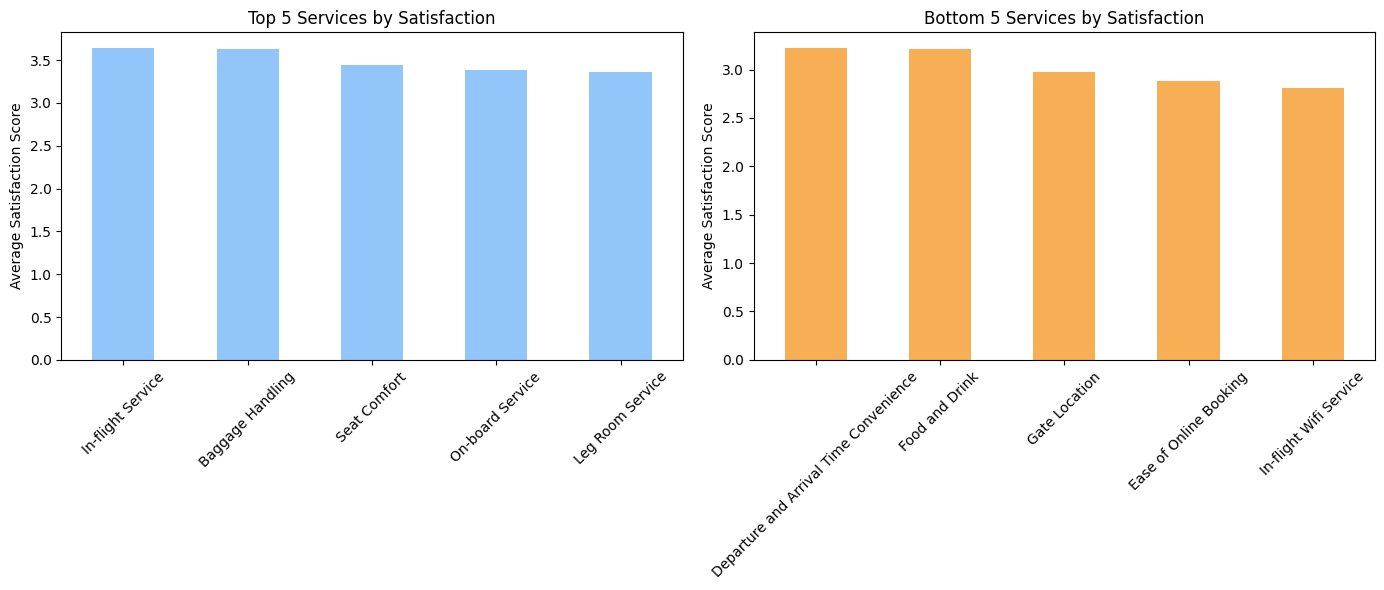

In [10]:
# What are the Top 5 rated services
#What are the 5 least liked services

# Calculate average satisfaction ratings across all flights for each service column
average_satisfaction = airline_data_cleaned[survey_columns].mean()

# Sort the average satisfaction ratings in descending order to find top and bottom services
sorted_satisfaction = average_satisfaction.sort_values(ascending=False)

# Get the top 5 and bottom 5 services
top_5_services = sorted_satisfaction.head(5)
bottom_5_services = sorted_satisfaction.tail(5)

# Display the results
print("Top 5 Services by Satisfaction:")
print(top_5_services)

print("\nBottom 5 Services by Satisfaction:")
print(bottom_5_services)

# Plotting the top 5 and bottom 5 satisfaction ratings
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_5_services.plot(kind='bar', color='#92C5F9', title='Top 5 Services by Satisfaction')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
bottom_5_services.plot(kind='bar', color='#F8AE54', title='Bottom 5 Services by Satisfaction')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

Customer Type: First Timers or Returning Passengers. Pie chart.

In [11]:
#Percentage of repeating customers
repeating_pass = airline_data[airline_data['Customer Type'] == 'Returning']
repeating_count = len(repeating_pass)
repeating_percentage = (repeating_count / total_passengers) * 100
repeating_percentage

81.69079149984601

In [12]:
# Percentage of First time customers
first_timers = airline_data[airline_data['Customer Type'] == 'First-time']
first_timers_count = len(first_timers)
first_timers_percentage = (first_timers_count / total_passengers) * 100
first_timers_percentage

18.30920850015399

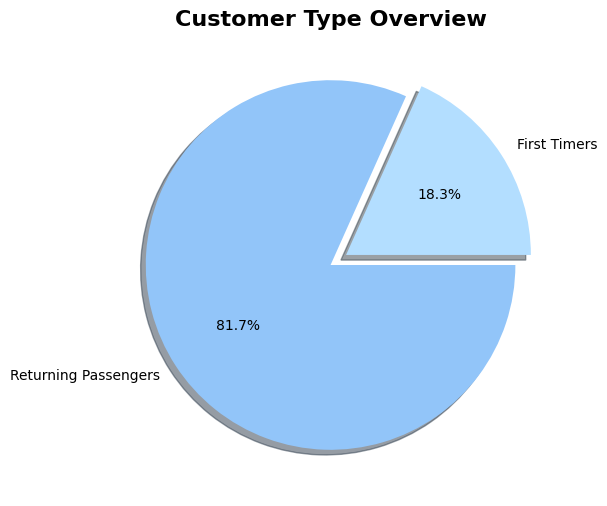

In [13]:
# Pie chart for Customer Type of the overall dataset
labels = ['First Timers', 'Returning Passengers']
sizes = [first_timers_percentage, repeating_percentage]
colors = ['#b3deff', '#92C5F9'] 
explode = (0.1, 0)

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle= 0, colors=colors, explode=explode, shadow=True)
plt.title('Customer Type Overview',fontsize=16, fontweight='bold')
plt.show()

**Gender Distribution**

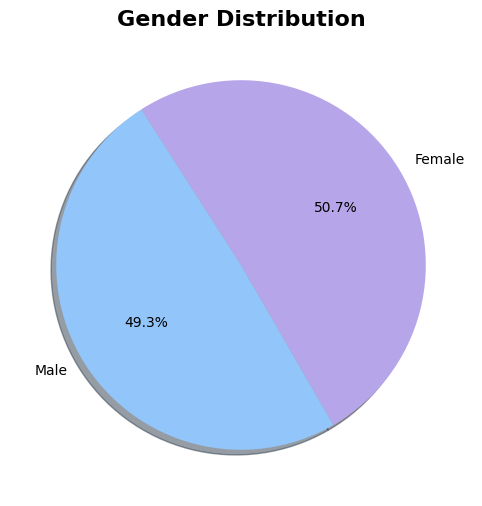

In [14]:
# Pie chart for Class of Seats of the overall dataset
# Count the classes of seats
gender_dist = airline_data_cleaned["Gender"].value_counts()

# Set colors and explode values
colors = ['#B6A6E9', '#92C5F9'] 
#explode = [0.1] * len(gender_dist)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.title('Gender Distribution',fontsize=16, fontweight='bold')
gender_dist.plot.pie(
    autopct="%.1f%%",  # Display percentages with 1 decimal place
    startangle=-60,
    shadow=True,
    colors=colors
)

# Show the plot
plt.ylabel('')  # Removing y-axis label for a cleaner look
plt.show()

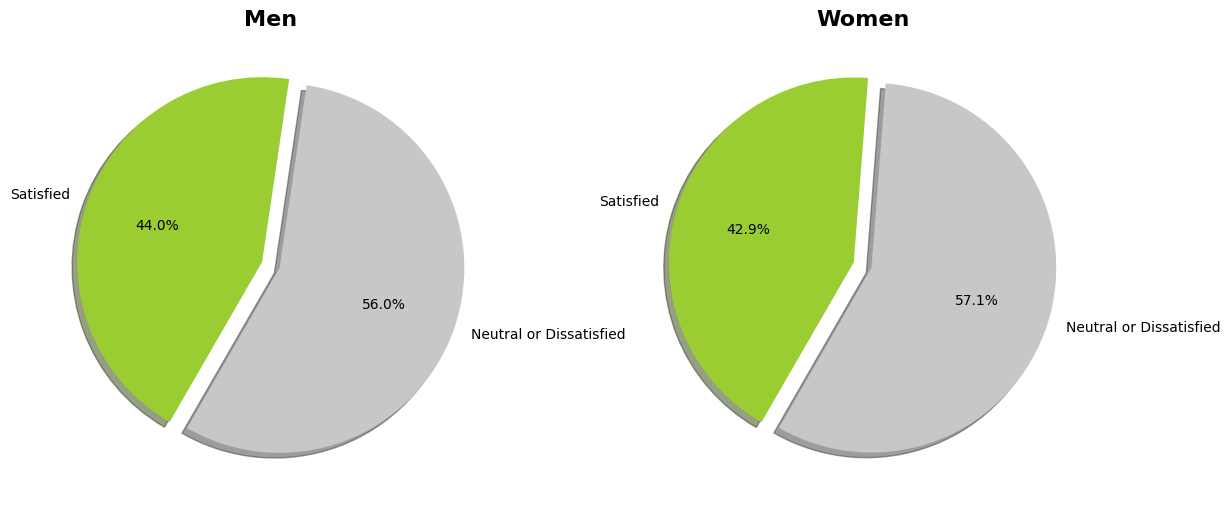

In [15]:
#overall satisfaction of flights by gender
# Filter data by gender 
male_data = airline_data_cleaned[airline_data_cleaned['Gender'] == 'Male']
female_data = airline_data_cleaned[airline_data_cleaned['Gender'] == 'Female']

# Calculate satisfaction level counts for gender1
male_sat = male_data['Satisfaction'].value_counts()
female_sat = female_data['Satisfaction'].value_counts()

# Set up the colors and explode values for pie charts
colors = ['#C7C7C7','yellowgreen'] 
explode = [0.05] * len(male_sat)  # Slight separation for each segment

# Plotting
plt.figure(figsize=(14, 6))

# Male satisfaction pie chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.title('Men', fontsize=16, fontweight='bold')
male_sat.plot.pie(autopct="%.1f%%", startangle=-120, explode=explode, colors=colors, shadow=True)
plt.ylabel('')  # Remove y-axis label for cleaner look

# Female satisfaction pie chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.title('Women',fontsize=16, fontweight='bold')
female_sat.plot.pie(autopct="%.1f%%", startangle=-120, explode=explode, colors=colors, shadow=True)
plt.ylabel('')  # Remove y-axis label for cleaner look

# Display the plots
plt.show()

**Length of the Flight and passenger happiness distribution**

In [16]:
# What is the distribution in flight data
#max flight data
flight_distance_max = airline_data['Flight Distance'].max()
#min Flight data
flight_distance_min = airline_data['Flight Distance'].min()

print(f"The shortest distance of flights is: {flight_distance_min} miles \nThe longest distance of flights is: {flight_distance_max} miles")

The shortest distance of flights is: 31 miles 
The longest distance of flights is: 4983 miles


In [17]:
# Creating bins for increments of 500 in the Flight data
bins = range(0, 5000, 500)

flight_distance_bins = pd.cut(airline_data_cleaned['Flight Distance'], bins=bins, right=False)
flight_distance_counts = flight_distance_bins.value_counts().sort_index()
print(flight_distance_counts)


Flight Distance
[0, 500)        40072
[500, 1000)     35017
[1000, 1500)    15392
[1500, 2000)    12518
[2000, 2500)     9522
[2500, 3000)     7032
[3000, 3500)     5090
[3500, 4000)     5147
[4000, 4500)       35
Name: count, dtype: int64


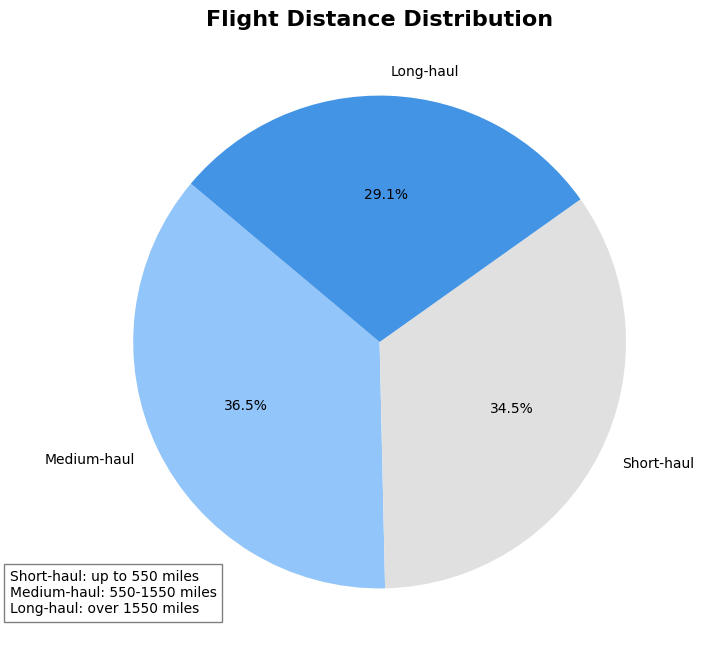

In [18]:
# Categorize flights based on distance
flight_type = airline_data_cleaned.copy()

flight_type['Flight Type'] = pd.cut(
    flight_type['Flight Distance'],
    bins=[0, 550, 1550, float('inf')],
    labels=['Short-haul', 'Medium-haul', 'Long-haul']
)

# Count the number of each flight type
flight_type_counts = flight_type['Flight Type'].value_counts(normalize=True) * 100

# Plot the flight type distribution as a pie chart
plt.figure(figsize=(10, 8))
plt.pie(flight_type_counts, labels=flight_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#92C5F9', '#E0E0E0', '#4394E5'])
plt.text(-1.5, -1.1, 'Short-haul: up to 550 miles\nMedium-haul: 550-1550 miles\nLong-haul: over 1550 miles',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.title('Flight Distance Distribution',fontsize=16, fontweight='bold')
plt.show()

In [20]:
# Define the service satisfaction columns
# service_columns = [
#     'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 
#     'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 
#     'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 
#     'In-flight Entertainment', 'Baggage Handling'
# ]
flight_type['Flight Type'] = pd.cut(
    flight_type['Flight Distance'],
    bins=[0, 550, 1550, float('inf')],
    labels=['Short-haul', 'Medium-haul', 'Long-haul']
)
# Calculate average satisfaction scores for each flight type
satisfaction_by_flight_type =flight_type.groupby('Flight Type')[survey_columns].mean()

# Display the satisfaction DataFrame
satisfaction_by_flight_type

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Flight Type,,,,,,,,,,,,,,
Short-haul,3.304813,2.856845,3.213936,3.161370,2.983272,3.272764,3.288331,3.249910,3.189672,3.157902,3.569023,2.816995,3.247722,3.564990
Medium-haul,3.276936,2.823895,3.283814,3.188253,2.959503,3.312740,3.326612,3.263771,3.222907,3.162363,3.630695,2.796971,3.245038,3.606794
Long-haul,3.066944,2.987671,3.444068,3.703129,2.991336,3.602496,3.766997,3.632254,3.481796,3.324845,3.743919,2.830460,3.632480,3.743522


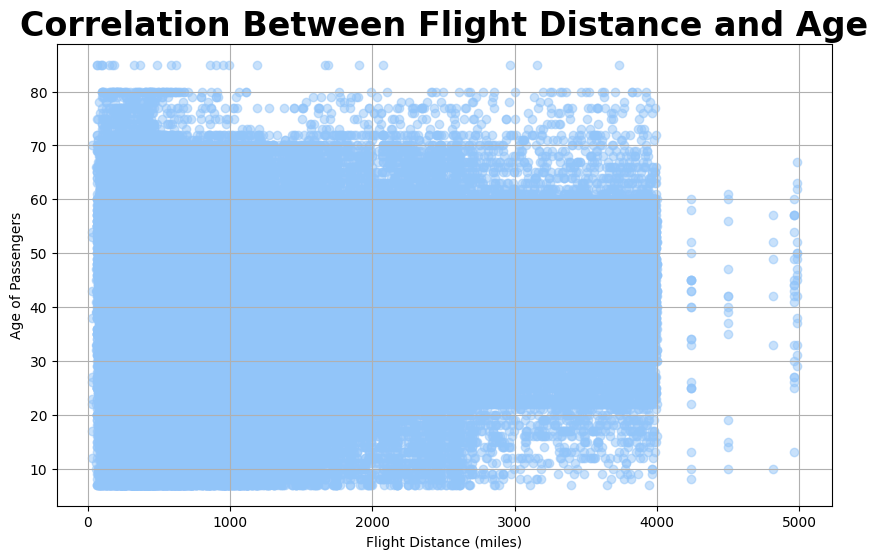

In [21]:
# Plot a scatter plot for flight distance vs. age
plt.figure(figsize=(10, 6))
plt.scatter(airline_data_cleaned['Flight Distance'], airline_data_cleaned['Age'], alpha=0.5, color='#92C5F9')
plt.title('Correlation Between Flight Distance and Age', fontsize = 24, fontweight = 'bold')
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Age of Passengers')
plt.grid(True)
plt.show()

**Newcomers and Returning Customers**

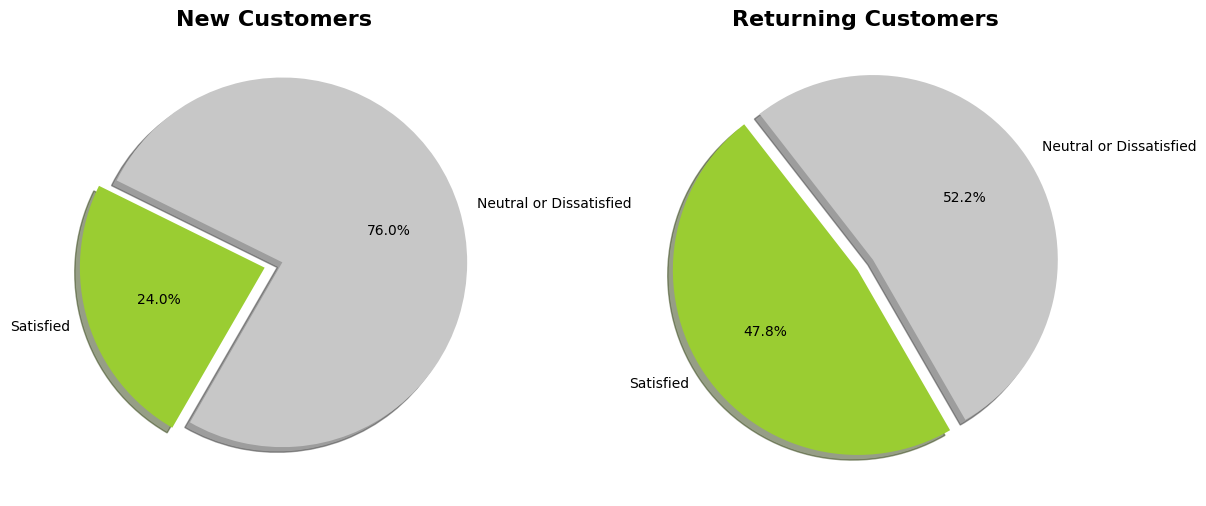

In [22]:
#overall satisfaction of flights by newcomers or returning customers

new_customer_data = airline_data_cleaned[airline_data_cleaned['Customer Type'] == 'First-time']
returning_customer_data = airline_data_cleaned[airline_data_cleaned['Customer Type'] == 'Returning']

# Calculate satisfaction level counts for gender1
new_customer= new_customer_data['Satisfaction'].value_counts()
returning_customer = returning_customer_data['Satisfaction'].value_counts()

# Set up the colors and explode values for pie charts
colors = ['#C7C7C7','yellowgreen'] 
explode = [0.05] * len(new_customer)  # Slight separation for each segment

# Plotting
plt.figure(figsize=(14, 6))

# Male satisfaction pie chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.title('New Customers', fontsize=16, fontweight='bold')
new_customer.plot.pie(autopct="%.1f%%", startangle=-120, explode=explode, colors=colors, shadow=True)
plt.ylabel('') 

# Female satisfaction pie chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.title('Returning Customers',fontsize=16, fontweight='bold')
returning_customer.plot.pie(autopct="%.1f%%", startangle=-60, explode=explode, colors=colors, shadow=True)
plt.ylabel('')  # Remove y-axis label for cleaner look

# Display the plots
plt.show()

In [23]:
#services groups depending on the type of passengers: new or returning
# Create a copy of the data frame
new_returning_df = airline_data_cleaned.copy()

# Group the data by Passenger Type and calculate the mean for each service-related column
new_returning_df = new_returning_df.groupby("Customer Type")[
    [
     "Departure and Arrival Time Convenience",
     "Ease of Online Booking",
     "Check-in Service",
     "Online Boarding",
     "Gate Location",
     "On-board Service",
     "Seat Comfort",
     "Leg Room Service",
     "Cleanliness", 
     "Food and Drink",
     "In-flight Service",
     "In-flight Wifi Service",
     "In-flight Entertainment",
     "Baggage Handling"
        ]
].mean()

# Display the result
new_returning_df



,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Customer Type,,,,,,,,,,,,,,
First-time,2.893759,2.835024,3.222708,2.838495,2.988982,3.235744,3.005971,3.220648,3.060723,3.048762,3.700084,2.816646,3.059378,3.694113
Returning,3.285945,2.893718,3.325027,3.439349,2.974250,3.416193,3.538978,3.399225,3.337330,3.243717,3.629389,2.812833,3.425605,3.618219


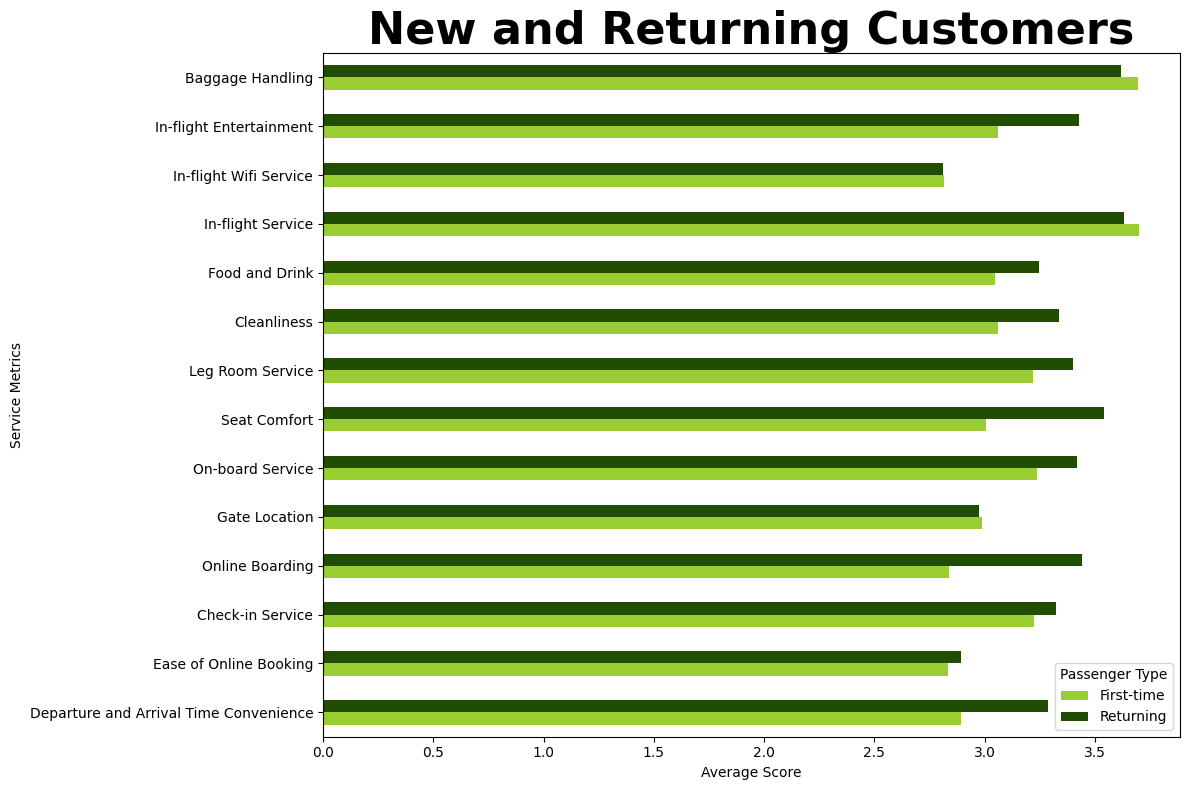

In [24]:
# Transpose the DataFrame to make survey metrics the x-axis and passenger types the series
new_returning_df_transposed = new_returning_df.T

# Plot the transposed DataFrame as a horizontal bar chart
new_returning_df_transposed.plot(kind='barh', figsize=(12, 8), color=["yellowgreen", "#204D00"])

# Adding labels and title
plt.title('New and Returning Customers', fontsize=32, fontweight='bold')
plt.xlabel('Average Score')
plt.ylabel('Service Metrics')
plt.xticks(rotation=0)  # Horizontal orientation of x-axis labels for readability
plt.legend(title='Passenger Type')

# Show the plot
plt.tight_layout()
plt.show()

**Survey results by class of travel**

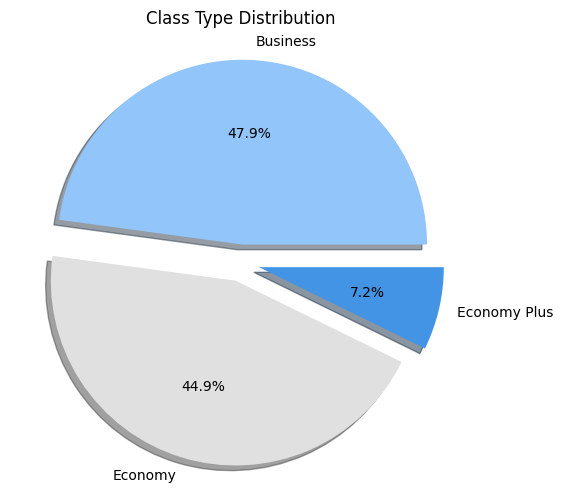

In [25]:
# Pie chart for Class of Seats of the overall dataset
# Count the classes of seats
seats_class = airline_data_cleaned["Class"].value_counts()

# Set colors and explode values
colors = ['#92C5F9', '#E0E0E0', '#4394E5'] 
explode = [0.1] * len(seats_class)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.title('Class Type Distribution')
seats_class.plot.pie(
    autopct="%.1f%%",  # Display percentages with 1 decimal place
    startangle=0,
    explode=explode,
    shadow=True,
    colors=colors
)

# Show the plot
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.show()

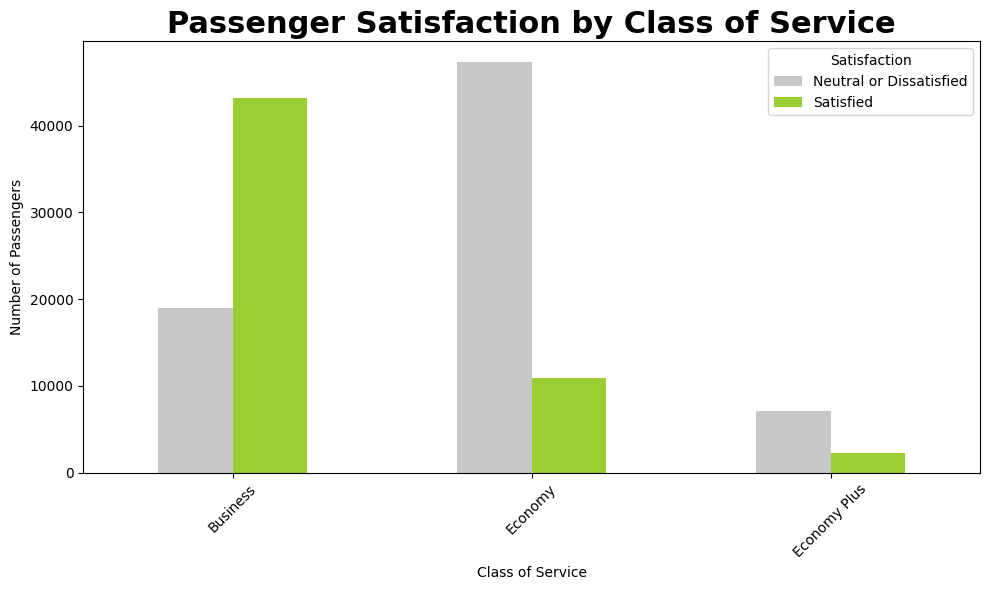

In [26]:
#Finding data chart between happiness of different service class
# Extract the data for "Average Cleanliness" by age group
class_sat_counts = airline_data.groupby(['Class', 'Satisfaction']).size().unstack(fill_value=0)

# Plot the bar chart
class_sat_counts.plot(kind='bar', stacked=False, figsize=(10, 6), 
                         color=["#C7C7C7", "yellowgreen"], alpha=1, align="center")

# Adding labels and title
plt.title('Passenger Satisfaction by Class of Service',fontsize=22, fontweight='bold')
plt.xlabel('Class of Service')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

**Survey Analysis by Impact of Delay**

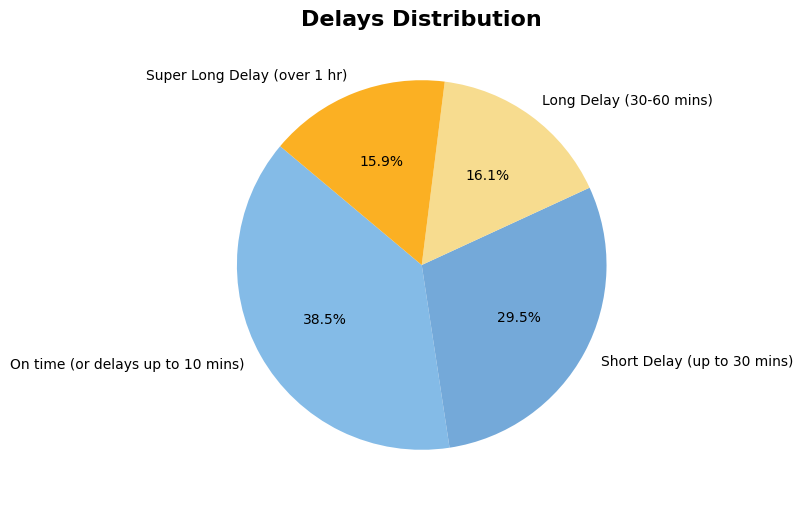

In [27]:
#Survey Analysis by Delay Impact 
#overall satisfaction and departure delays chart
delays_type = airline_data_cleaned.copy()
delays_type['Departure Delay'].fillna(0, inplace=True)

delays_type['Departure Delay'] = pd.cut(
    delays_type['Departure Delay'],
    bins=[0, 10, 30, 60, float('inf')],
    labels=[
        'On time (or delays up to 10 mins)', 
        'Short Delay (up to 30 mins)', 
        'Long Delay (30-60 mins)', 
        'Super Long Delay (over 1 hr)'
    ]
)

# Count the number of each flight type
delays_type_counts = delays_type['Departure Delay'].value_counts(normalize=True) * 100

# Plot the flight type distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(delays_type_counts, labels=delays_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#84bbe7', '#74a9d9', '#f7dc8f','#fbb023'])
plt.title('Delays Distribution',fontsize=16, fontweight='bold')
plt.show()

In [28]:
#Establishing the bins
delay_bins = [0, 10, 30, 60, float('inf')]
delay_labels = ["On time (0 or delay up to 10 mins)", "Short Delay (up to 30 mins)","Long Delay (30-60 mins)","Super Long Delay (over 1 hr)"]
# Create a copy of the data frame
delays_df = airline_data_cleaned.copy()
delays_df["Type of Departure Delays"] = pd.cut(delays_df["Departure Delay"], bins=delay_bins, labels=delay_labels)

# Converting NaN in 'Departure Delay' to 0, representing "on time" flights
delays_df["Departure Delay"].fillna(0, inplace=True)

# Calculate average satisfaction scores for each flight type
satisfaction_by_delays_type =delays_df.groupby('Type of Departure Delays')[survey_columns].mean()

# Display the satisfaction DataFrame
satisfaction_by_delays_type

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Type of Departure Delays,,,,,,,,,,,,,,
On time (0 or delay up to 10 mins),3.219675,2.867194,3.345490,3.337005,2.973544,3.415185,3.476162,3.373397,3.304382,3.219011,3.684121,2.799451,3.372744,3.653730
Short Delay (up to 30 mins),3.194059,2.853303,3.285517,3.283534,2.982587,3.354930,3.432148,3.342156,3.274098,3.198631,3.637204,2.747046,3.326227,3.612826
Long Delay (30-60 mins),3.192964,2.844134,3.234024,3.233795,2.990135,3.318097,3.390551,3.326254,3.215875,3.154200,3.597501,2.725258,3.295033,3.588074
Super Long Delay (over 1 hr),3.195133,2.839703,3.218186,3.208168,3.003454,3.249916,3.317138,3.385475,3.222557,3.115008,3.443343,2.724613,3.245041,3.598329


no significant impact on the airline service rating based on flight delays was found

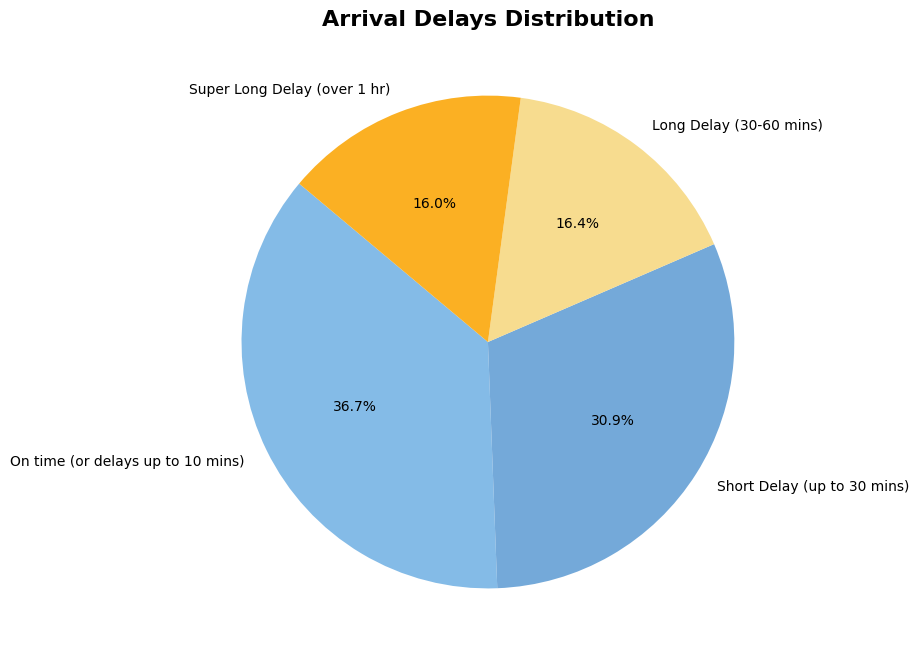

In [29]:
#Survey Analysis by Delay Impact 
#overall satisfaction and arrival delays pie chart
arr_delays_type = airline_data_cleaned.copy()
arr_delays_type['Arrival Delay'].fillna(0, inplace=True)

arr_delays_type['Arrival Delay'] = pd.cut(
    arr_delays_type['Arrival Delay'],
    bins=[0, 10, 30, 60, float('inf')],
    labels=[
        'On time (or delays up to 10 mins)', 
        'Short Delay (up to 30 mins)', 
        'Long Delay (30-60 mins)', 
        'Super Long Delay (over 1 hr)'
    ]
)

# Count the number of each flight type
arr_delays_type_counts = arr_delays_type['Arrival Delay'].value_counts(normalize=True) * 100

# Plot the flight type distribution as a pie chart
plt.figure(figsize=(10, 8))
plt.pie(arr_delays_type_counts, labels=arr_delays_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#84bbe7', '#74a9d9', '#f7dc8f','#fbb023'])
plt.title('Arrival Delays Distribution',fontsize=16, fontweight='bold')
plt.show()

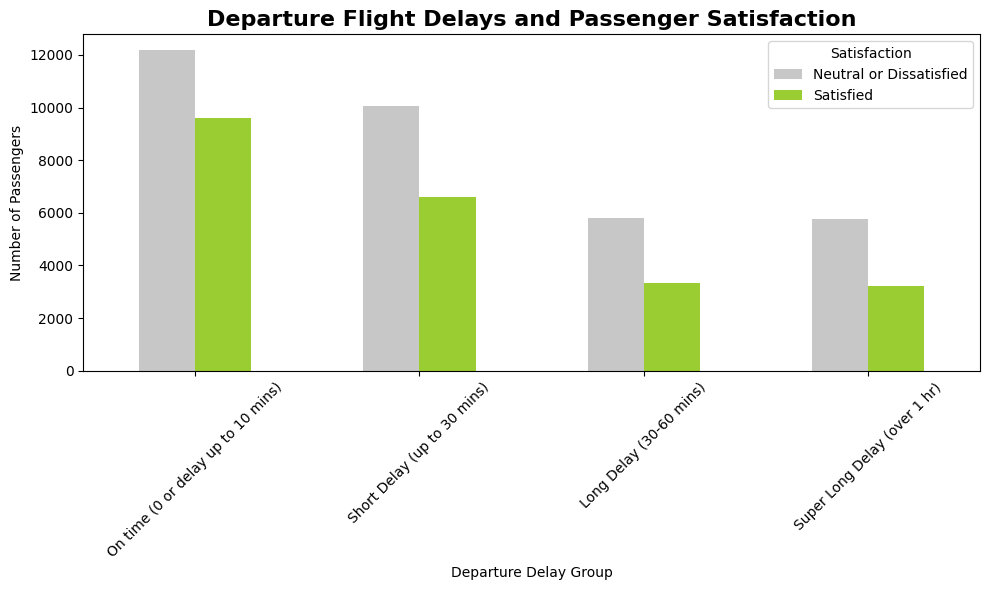

In [30]:
#let's check whether the factor of a delayed flight affects the passenger rating
# Group the data by "Delayed Departure" and "Satisfaction"
sat_delay_counts = delays_df.groupby(['Type of Departure Delays', 'Satisfaction']).size().unstack(fill_value=0)

# Plot the bar chart with different colors for Satisfied and Not Satisfied
sat_delay_counts.plot(kind='bar', stacked=False, figsize=(10, 6), 
                         color=["#C7C7C7", "yellowgreen"], alpha=1, align="center")


# Adding labels and title
plt.title('Departure Flight Delays and Passenger Satisfaction',fontsize=16, fontweight='bold')
plt.xlabel('Departure Delay Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

no significant impact

### Customer Satisfaction Analysis


**Survey results by age**

In [31]:
#Establishing the bins
age_bins = [0, 12, 18, 25, 35, 45, 55, float('inf')]#covering all people from birth age
labels = ["0-12", "12-18","18-25","25-35","35-45","45-55",">55"]
# Create a copy of the data frame
passenger_age_df = airline_data_cleaned.copy()
passenger_age_df["Passenger Age Ranges"] = pd.cut(passenger_age_df["Age"], bins=age_bins, labels=labels)

passenger_age_df["Passenger Age Ranges"]=passenger_age_df["Passenger Age Ranges"].astype(str)
passenger_age_df
# passenger_age_df.index.name = 

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Passenger Age Ranges
0,1,Male,48,First-time,Business,Business,821,2,5.0,3.0,...,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,Neutral or Dissatisfied,45-55
1,2,Female,35,Returning,Business,Business,821,26,39.0,2.0,...,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,Satisfied,25-35
2,3,Male,41,Returning,Business,Business,853,0,0.0,4.0,...,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,Satisfied,35-45
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2.0,...,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,Satisfied,45-55
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3.0,...,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,Satisfied,45-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4.0,...,1.0,4.0,4.0,4.0,5.0,4.0,4.0,4,Neutral or Dissatisfied,25-35
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5.0,...,2.0,5.0,2.0,2.0,4.0,3.0,2.0,5,Neutral or Dissatisfied,35-45
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5.0,...,3.0,4.0,3.0,3.0,4.0,2.0,3.0,5,Neutral or Dissatisfied,35-45
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4.0,...,4.0,5.0,3.0,3.0,4.0,5.0,3.0,5,Satisfied,45-55


In [32]:
# calculate averages for survey observation withing the age group 
Schedule_Comfort_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Departure and Arrival Time Convenience"].mean()
Online_Booking_Comfort_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Ease of Online Booking"].mean()
Checkin_Service_Comfort_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Check-in Service"].mean()
Online_Boarding_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Online Boarding"].mean()
Gate_Location_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Gate Location"].mean()

Onboard_Service_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["On-board Service"].mean()
Seat_Comfort_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Seat Comfort"].mean()
Leg_Comfort_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Leg Room Service"].mean()
Cleanliness_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Cleanliness"].mean()
Food_Drink_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Food and Drink"].mean()

Inflight_Service_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["In-flight Service"].mean()
Inflight_Wifi_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["In-flight Wifi Service"].mean()
Inflight_Entertainment_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["In-flight Entertainment"].mean()
Baggage_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Baggage Handling"].mean()


In [33]:
#Assembling into DataFrame
Age_Survey_df = pd.DataFrame({
    "Average Departure and Arrival Time Convenience": Schedule_Comfort_age_score,
    "Average Ease of Online Booking": Online_Booking_Comfort_age_score,
    "Averge Check-in Service": Checkin_Service_Comfort_age_score ,
    "Average Online Boarding": Online_Boarding_age_score,
    "Average Gate Location": Gate_Location_age_score,

    "Average On-board Service": Onboard_Service_age_score,
    "Average Seat Comfort": Seat_Comfort_age_score,
    "Average Leg Room Comfort": Leg_Comfort_age_score,
    "Average Cleanliness": Cleanliness_age_score,
    "Average Food & Drink": Food_Drink_age_score,
    "Average In-flight Service": Inflight_Service_age_score,
    "Average In-flight Wifi Service": Inflight_Wifi_age_score,
    "Average In-flight Entertainment": Inflight_Entertainment_age_score,
    "Average Baggage Handling": Baggage_age_score
})

#Display results
Age_Survey_df

,Average Departure and Arrival Time Convenience,Average Ease of Online Booking,Averge Check-in Service,Average Online Boarding,Average Gate Location,Average On-board Service,Average Seat Comfort,Average Leg Room Comfort,Average Cleanliness,Average Food & Drink,Average In-flight Service,Average In-flight Wifi Service,Average In-flight Entertainment,Average Baggage Handling
Passenger Age Ranges,,,,,,,,,,,,,,
0-12,3.514995,2.683794,3.224656,2.688582,2.924489,3.216729,2.950563,3.214435,2.996453,2.983065,3.707551,2.587396,3.003130,3.678139
12-18,3.465793,2.779166,3.211440,2.827696,2.999681,3.191683,3.047801,3.208094,3.098980,3.090517,3.696144,2.701705,3.113962,3.692001
18-25,3.258022,2.933645,3.237502,3.050053,2.961001,3.253289,3.112670,3.207975,3.168831,3.160604,3.693621,2.873072,3.165204,3.690288
25-35,3.160743,2.844112,3.239606,3.109091,2.988461,3.269557,3.273842,3.250976,3.270672,3.250478,3.671517,2.761446,3.292563,3.641100
35-45,3.131108,2.919150,3.330611,3.453741,2.989287,3.474458,3.560459,3.486739,3.336654,3.225995,3.653776,2.871263,3.467991,3.649051
45-55,3.183610,2.934884,3.421243,3.670795,2.984945,3.556754,3.745836,3.544938,3.427074,3.267948,3.659704,2.879246,3.559803,3.652769
>55,3.312700,2.844098,3.305090,3.474340,2.954509,3.361923,3.571126,3.310650,3.274778,3.184602,3.500329,2.744328,3.333490,3.497533


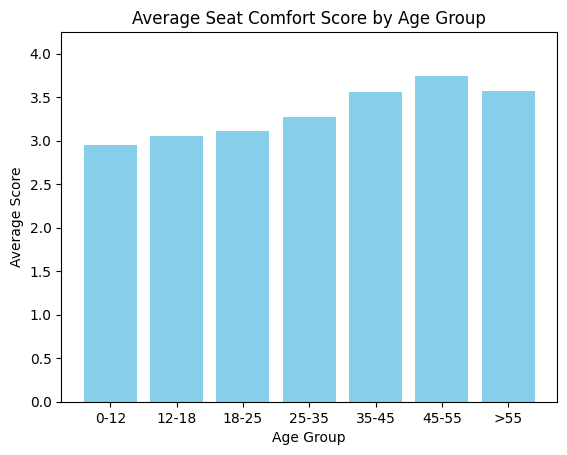

In [34]:
# Extract the data for "Average Seat Comfort" by age group
average_seat_comfort = Age_Survey_df["Average Seat Comfort"]
x_axis = average_seat_comfort.index.values
y_axis = average_seat_comfort.values
#Create a Pyplot bar plot based off the group series from before and label the title
plt.bar(x_axis, y_axis, color = "skyblue", alpha = 1, align = "center")

# Set chart title and labels
plt.title('Average Seat Comfort Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.ylim(0, y_axis.max() + 0.5)

# Show the plot
# plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()


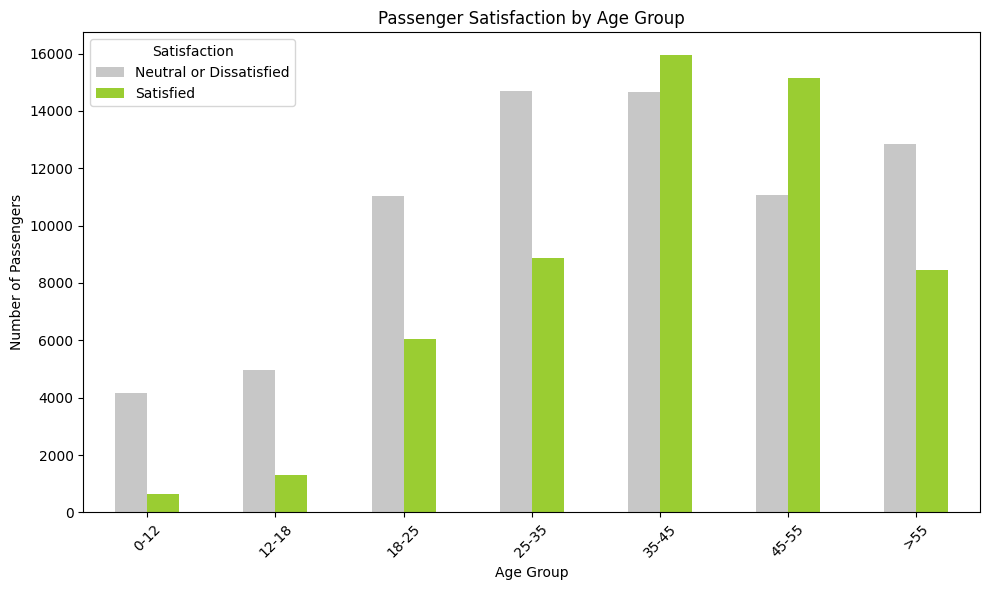

In [35]:
#let's find out what people are thinking overall about airline service depending on their age 
# Group the data by "Passenger Age Ranges" and "Satisfaction"
satisfaction_by_age = passenger_age_df.groupby(['Passenger Age Ranges', 'Satisfaction']).size().unstack(fill_value=0)
# Plot the bar chart with different colors for Satisfied and Not Satisfied
satisfaction_by_age.plot(kind='bar', stacked=False, figsize=(10, 6), 
                         color=["#C7C7C7", "yellowgreen"], alpha=1, align="center")

# Adding labels and title
plt.title('Passenger Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

Class of Travel

In [36]:
#by this part of calculations we want to understand if there significant differences between class of cabin and happiness of passengers
# Grouping the summary and creating DataFrame with Survey results by class of traveling:
class_of_service_df = airline_data_cleaned.copy()

Schedule_Comfort_class_score = class_of_service_df.groupby(["Class"])["Departure and Arrival Time Convenience"].mean()
Online_Booking_Comfort_class_score = class_of_service_df.groupby(["Class"])["Ease of Online Booking"].mean()
Checkin_Service_Comfort_class_score = class_of_service_df.groupby(["Class"])["Check-in Service"].mean()
Online_Boarding_class_score = class_of_service_df.groupby(["Class"])["Online Boarding"].mean()
Gate_Location_class_score = class_of_service_df.groupby(["Class"])["Gate Location"].mean()

Onboard_Service_class_score = class_of_service_df.groupby(["Class"])["On-board Service"].mean()
Seat_Comfort_class_score = class_of_service_df.groupby(["Class"])["Seat Comfort"].mean()
Leg_Comfort_class_score = class_of_service_df.groupby(["Class"])["Leg Room Service"].mean()
Cleanliness_class_score = class_of_service_df.groupby(["Class"])["Cleanliness"].mean()
Food_Drink_class_score = class_of_service_df.groupby(["Class"])["Food and Drink"].mean()

Inflight_Service_class_score = class_of_service_df.groupby(["Class"])["In-flight Service"].mean()
Inflight_Wifi_class_score = class_of_service_df.groupby(["Class"])["In-flight Wifi Service"].mean()
Inflight_Entertainment_class_score = class_of_service_df.groupby(["Class"])["In-flight Entertainment"].mean()
Baggage_class_score = class_of_service_df.groupby(["Class"])["Baggage Handling"].mean()

# Assembling into a DataFrame
Class_Survey_df = pd.DataFrame({
    "Average Departure and Arrival Time Convenience": Schedule_Comfort_class_score,
    "Average Ease of Online Booking": Online_Booking_Comfort_class_score,
    "Average Check-in Service": Checkin_Service_Comfort_class_score,
    "Average Online Boarding": Online_Boarding_class_score,
    "Average Gate Location": Gate_Location_class_score,
    "Average On-board Service": Onboard_Service_class_score,
    "Average Seat Comfort": Seat_Comfort_class_score,
    "Average Leg Room Comfort": Leg_Comfort_class_score,
    "Average Cleanliness": Cleanliness_class_score,
    "Average Food & Drink": Food_Drink_class_score,
    "Average In-flight Service": Inflight_Service_class_score,
    "Average In-flight Wifi Service": Inflight_Wifi_class_score,
    "Average In-flight Entertainment": Inflight_Entertainment_class_score,
    "Average Baggage Handling": Baggage_class_score
})

# Display the resulting DataFrame
Class_Survey_df.index.name = "Class of Service"
Class_Survey_df


,Average Departure and Arrival Time Convenience,Average Ease of Online Booking,Average Check-in Service,Average Online Boarding,Average Gate Location,Average On-board Service,Average Seat Comfort,Average Leg Room Comfort,Average Cleanliness,Average Food & Drink,Average In-flight Service,Average In-flight Wifi Service,Average In-flight Entertainment,Average Baggage Handling
Class of Service,,,,,,,,,,,,,,
Business,3.047442,3.044260,3.521067,3.759860,2.985151,3.682825,3.763767,3.655334,3.482222,3.331938,3.846577,2.891755,3.639819,3.844852
Economy,3.398372,2.724554,3.124423,2.917292,2.969576,3.119707,3.141813,3.104328,3.105034,3.090425,3.466497,2.728649,3.096784,3.450617
Economy Plus,3.317119,2.796606,3.014557,2.998344,2.968441,3.036234,3.168207,3.073848,3.120468,3.117691,3.382850,2.833406,3.122488,3.351504


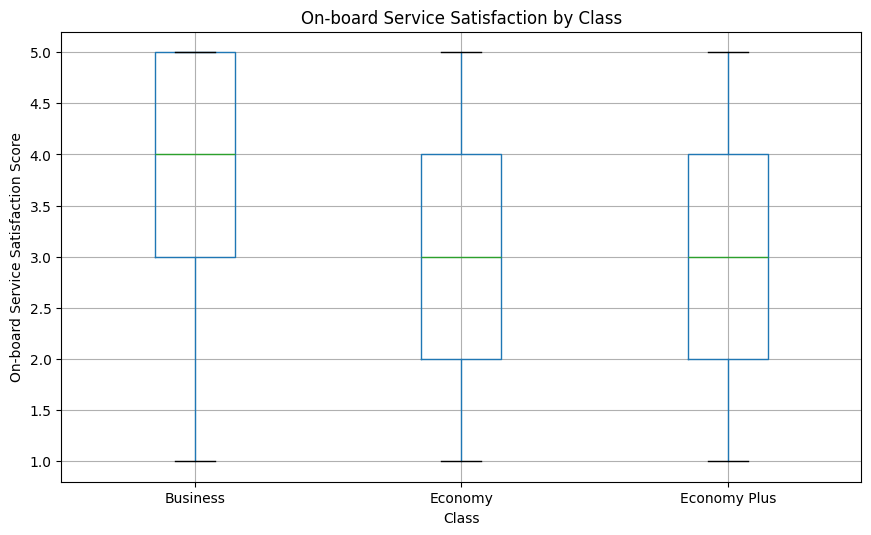

In [37]:

# ANOVA analysis class of service and satisfaction of onboard service

# Boxplot to visualize On-board Service satisfaction by Class
airline_data_cleaned.boxplot("On-board Service", by="Class", figsize=(10, 6))
plt.title("On-board Service Satisfaction by Class")
plt.suptitle("")  # Removes default 'Boxplot grouped by Class' title
plt.xlabel("Class")
plt.ylabel("On-board Service Satisfaction Score")
plt.show()

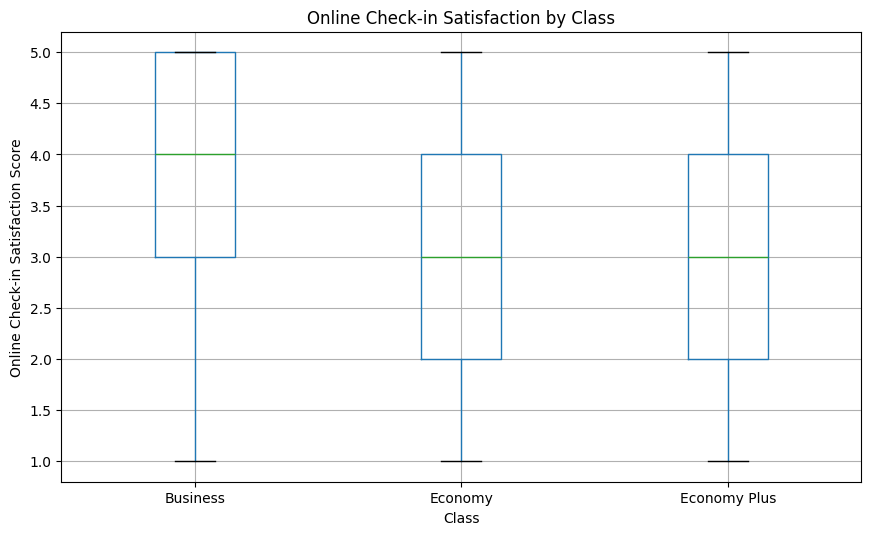

In [38]:
# Boxplot to visualize Online Boarding satisfaction by Class
airline_data_cleaned.boxplot("Online Boarding", by="Class", figsize=(10, 6))
plt.title("Online Check-in Satisfaction by Class")
plt.suptitle("")
plt.xlabel("Class")
plt.ylabel("Online Check-in Satisfaction Score")
plt.show()

In [39]:
# Define groups based on Class for On-board Service
group0 = airline_data_cleaned[airline_data_cleaned["Class"] == 0]["On-board Service"]
group1 = airline_data_cleaned[airline_data_cleaned["Class"] == 1]["On-board Service"]
group2 = airline_data_cleaned[airline_data_cleaned["Class"] == 2]["On-board Service"]

In [40]:
# Perform ANOVA with the correct alias
anova_result = st.f_oneway(group0, group1, group2)

# Display the ANOVA result
anova_result


F_onewayResult(statistic=nan, pvalue=nan)